First, we import all libraries to be used in this project.

>- Steps Followed:<br> a) Specifying the question<br> b) Defining the metric of sucess<br>

In [75]:
from pyforest import *

In [76]:
# loading the dataset
# data = pd.read_csv('/content/drive/MyDrive/project_02/kc_house_data.csv')
data = pd.read_csv('./data/kc_house_data.csv')
data.sample(5)

<IPython.core.display.Javascript object>

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13943,8805900065,11/12/2014,1160000.0,5,3.25,4290,7019,2.5,NaN,NONE,...,10 Very Good,3590,700.0,1927,0.0,98112,47.6439,-122.302,1920,4000
2312,2451000070,4/2/2015,1400000.0,4,2.50,2770,8879,2.0,NO,NONE,...,9 Better,2770,0.0,2001,0.0,98004,47.5831,-122.193,2770,8882
1569,934300140,3/23/2015,284950.0,4,1.50,2000,6778,1.0,NO,NONE,...,7 Average,1170,830.0,1962,0.0,98198,47.3708,-122.311,1940,7531
2285,4024101715,9/5/2014,306000.0,3,1.00,910,8658,1.0,NO,NONE,...,7 Average,910,0.0,1955,NaN,98155,47.7586,-122.303,1170,10200
19890,8032700075,10/15/2014,622000.0,3,3.50,1690,1765,2.0,NO,NONE,...,8 Good,1370,320.0,2006,0.0,98103,47.6536,-122.340,1690,1694


# 2.0 Data Understanding

>- The main focus here is the pricing of the houses by the real estate company.<br>The prices of houses may vary depending on a number of factors such as:


    * id	- Unique identifier for a house
    * date - Date house was sold
    * price - Sale price (prediction target)
    * bedrooms - Number of bedrooms
    * bathrooms - Number of bathrooms
    * sqft_living - Square footage of living space in the home
    * sqft_lot - Square footage of the lot
    * floors - Number of floors (levels) in house
    * waterfront - Whether the house is on a waterfront
    * view - Quality of view from house
    * condition	-	How good the overall condition of the house is. Related to maintenance of house
    * grade - Overall grade of the house. Related to the construction and design of the house
    * sqft_above - Square footage of house apart from basement
    * sqft_basement - Square footage of the basement
    * yr_built - Year when house was built
    * yr_renovated - Year when house was renovated
    * zipcode - ZIP Code used by the United States Postal Service
    * lat - Latitude coordinate
    * long - Longitude coordinate
    * sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    * sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# EDA

In [77]:
# Total number of rows and columns.

print("The number of rows is", data.shape[0])
print('The number of columns is', data.shape[1])

The number of rows is 21597
The number of columns is 21


In [78]:
# Viewing the columns of the dataset, the data type and if there are any null values.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [79]:
# Viewing the statistical summary of the dataset.

data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3.1 Data Cleaning

**Identify and remove duplicated records**

In [80]:
# data[data.duplicated()].shape[0]
# data.duplicated().any()
# data.duplicated().sum()

In [81]:
# Any dulplicated homes?
duplicates_len = len(data[data.duplicated(subset=['id'], 
                                      keep=False)].sort_values(by='id'))

print(f"Results:\nThere are {duplicates_len} duplicated records.")
data[data.duplicated(subset=['id'], keep=False)].sort_values(by='id').head(4)

Results:
There are 353 duplicated records.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.0,2400,9373,2.0,NO,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.0,2400,9373,2.0,NaN,NONE,...,7 Average,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.0,840,12750,1.0,NO,NONE,...,6 Low Average,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969


The duplicated records based on ID are from the same homes that sold within the same year. <br>These homes have the same attributes except for sale date.<br> These may be homes that were flipped or sold quickly after an initial sale. <br>We will keep these records because we are interested in predicting a home's sale price and these give more data for the true value of a house.

**Identifying Missing values**

In [82]:
# How many columns have NaN?
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [83]:
# Was a house renovated or not?

data.yr_renovated.fillna('NO',inplace=True) # replace null with 0 the most common value

data['yr_renovated'] = data['yr_renovated'].replace(0.0, 'NO') # Replace zero with NO

data.loc[data['yr_renovated'] != 'NO', 'yr_renovated'] = 'YES' # Replace the years with YES, as these were renovated

data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

data.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,NO,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,YES,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NO,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,NO,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,NO,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,NO,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,NO,98003,47.3097,-122.327,2238,6819


In [84]:
# data cleaning

def process_data(data):
    # Dropping unwanted columns
    data.drop(['date', 'id', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

    data['sqft_basement'] = data['sqft_basement'].str.replace(r'?', '').replace('', np.nan).astype(float)  # replacing special characters and converting dtype
    data['sqft_basement'].fillna(data['sqft_basement'].median(), inplace=True)  # replaced null in sqft_basement with median
    data['waterfront'].fillna('NO', inplace=True)  # replaced null in waterfront with NO
    data['view'].fillna('NONE', inplace=True)  # replace nulls in view with None
    data['bedrooms'] = data['bedrooms'].replace(33, 3)  # replaces 33 with 3 because clearly that's an outlier

    return data
    
data = process_data(data)

<IPython.core.display.Javascript object>

### Assumptions
>- Without additional information Zipcode is not reliable as a location factor as latitude and longitude. e.g  <br> Based on our code latitude and longitude are more precise markers. <br>
>- Dropped 'sqft_living15', 'sqft_lot15' to focus on the particular house with its sqft_living and sqft_lot
>- Null values in waterfront replaced with NO as the mode.
>- Replaced 33 bedroomed house with 3 rooms as it made no sense judging from its price and its a 1-floor house. This is clearly an input error


In [85]:
# to confirm that we do not have any more null values
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
lat              0
long             0
dtype: int64

In [86]:
#check the unique values of the categorical attributes
print("waterfront:", data['waterfront'].unique())
print()
print("views:", data['view'].unique())
print()
print("grade:", data['grade'].unique())
print()
print("conditions:", data['condition'].unique())

waterfront: ['NO' 'YES']

views: ['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']

grade: ['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']

conditions: ['Average' 'Very Good' 'Good' 'Poor' 'Fair']


## 3.2 Exploratory Data Analysis



### 1. Univariate analysis

We will visualise the summary statistics of each individual predictor variable in the dataset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

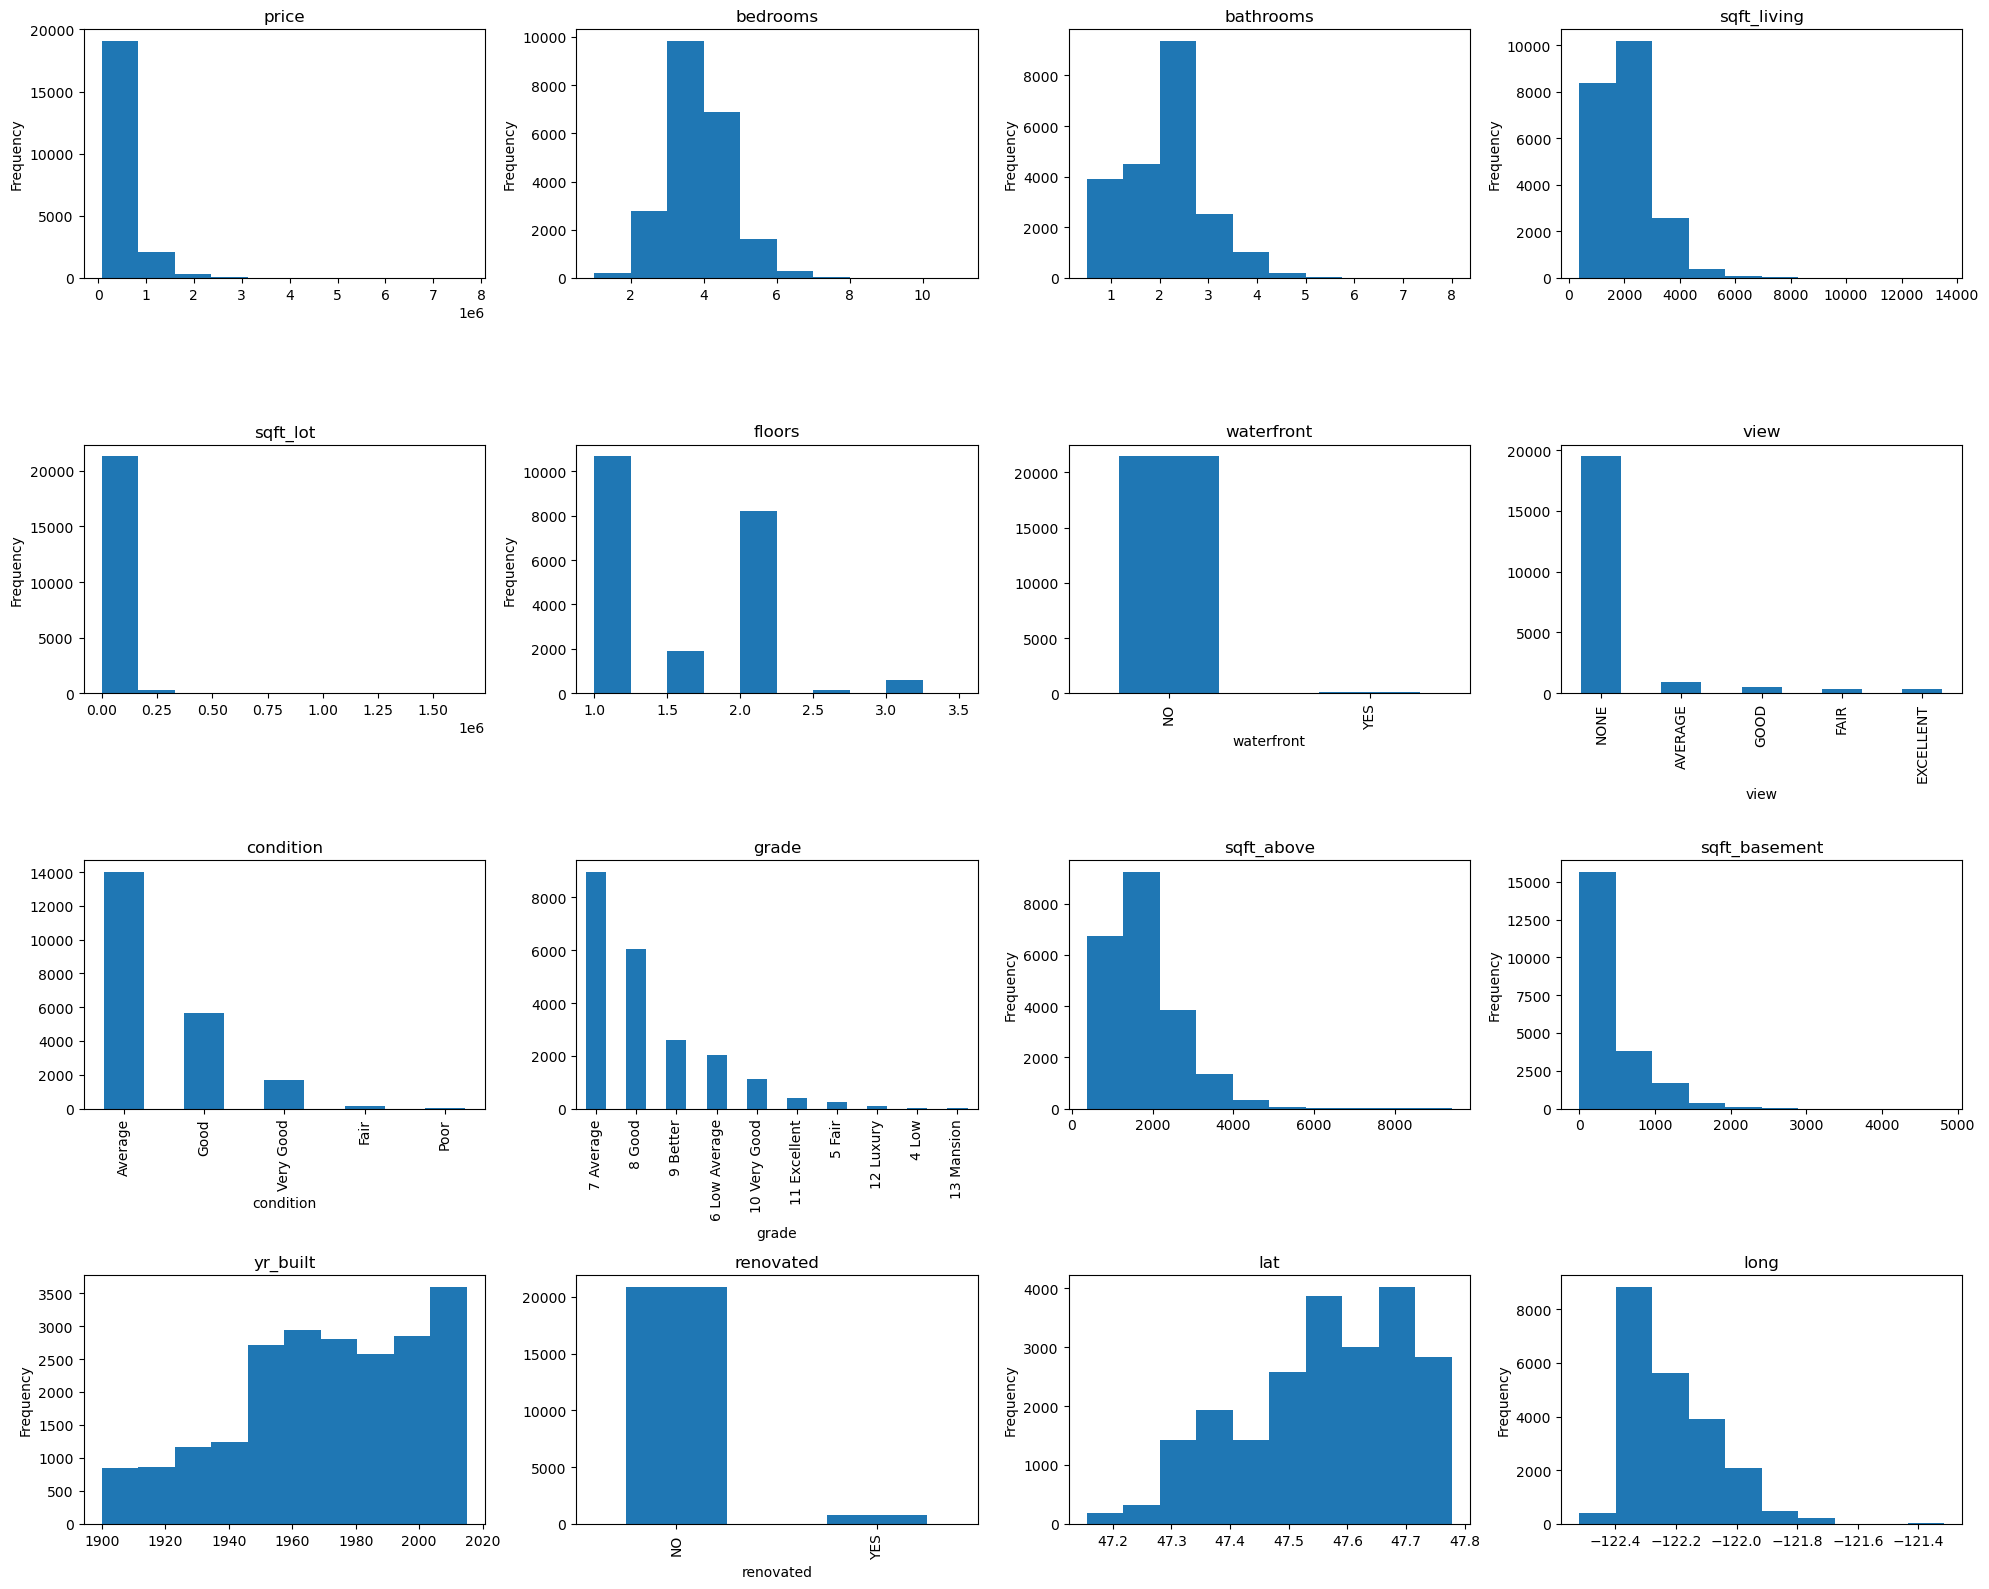

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [87]:
# Create a list of columns to plot
columns_to_plot = data.columns

# Calculate the number of rows and columns for the subplots
num_rows = len(columns_to_plot) // 4 + (len(columns_to_plot) % 4 > 0)
num_cols = min(len(columns_to_plot), 4)

# Create the figure and axes objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

# Flatten the axes array if it's a single row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_cols == 1:
    axes = axes.reshape(-1, 1)

# Iterate over the columns and plot on each subplot
for i, column in enumerate(columns_to_plot):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    ax.set_title(column)

    if is_numeric_dtype(data[column]):
        data[column].plot(kind='hist', ax=ax)
    elif is_string_dtype(data[column]):
        data[column].value_counts()[:10].plot(kind='bar', ax=ax)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as a PDF with reduced DPI
plt.savefig('histogram.pdf', format='pdf', dpi=80)


Represented continous data with histogram and categorical data with bargraphs <br>
Observations from the above histograms and bargraphs:
1. 'price' is right skewed. Meaning it is not symmetrical.
2. 'bedrooms' and 'bathrooms' look to be discrete counts of those home features, as does 'floors'. 
3. 'sqft_above', 'sqft_living', 'sqft_basement' and 'sqft_lot' all look to be continuous, so is 'price'. 

In conlusion, we can note both the presence of some extreme outliers and data skewness in most of the distributions.







*  A box plot to visualize the 'price' distribution.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

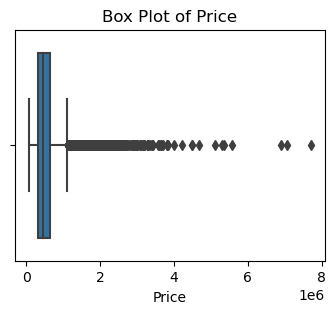

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.savefig('boxplot.pdf', format='pdf')

The box represents the interquartile range (IQR), with the horizontal line inside indicating the median. The whiskers extend to the minimum and maximum non-outlier values, while any data points outside the whiskers are considered outliers.

The observation made is that there are a lot of outliers in the 'price' variable, as indicated by the data points outside the whiskers of the box plot. 
We will maintain the outliers because it could be a true indication of houes prices in King County.

### 2. Bivariate Analysis

**Converting categorical to Numerical**

In [89]:
def convert_categorical_to_numerical(data):
    # Mapping for 'renovated'
    renovated_mapping = {'NO': 0, 'YES': 1}
    data['renovated'] = data['renovated'].replace(renovated_mapping).astype(float)

    # Mapping for 'view'
    view_mapping = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
    data['view'] = data['view'].replace(view_mapping).astype(float)

    # Mapping for 'condition'
    condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
    data['condition'] = data['condition'].replace(condition_mapping).astype(float)

    # Mapping for 'waterfront'
    waterfront_mapping = {'NO': 0, 'YES': 1}
    data['waterfront'] = data['waterfront'].replace(waterfront_mapping).astype(float)

    # Mapping for 'grade'
    data['grade'] = data['grade'].map(lambda x: int(x[0:2]))

    return data

data = convert_categorical_to_numerical(data)

Converting categorical to numerical values allows for mathematical operations to be performed on those variables e.g logarithm transformation, improve model performance etc.



**Correlation between the target variable (Price) and the predictors.**




In [90]:
# setting the target variable as price; check how the predictor variables correlate with price and identify the highest correlated

data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.315954
lat              0.306692
waterfront       0.264306
floors           0.256804
renovated        0.117543
sqft_lot         0.089876
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64

From the results, sqft_living has the highest correlation with price.

grade, sqft_above and bathrooms have a considerably higher correlation with price. This knowledge will guide us in the predictor variables we choose for the model.
long, yr_built and sft_lot have a lower correlation wit price.

 

**Visualization of the correlation between all the variables using a heat map**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

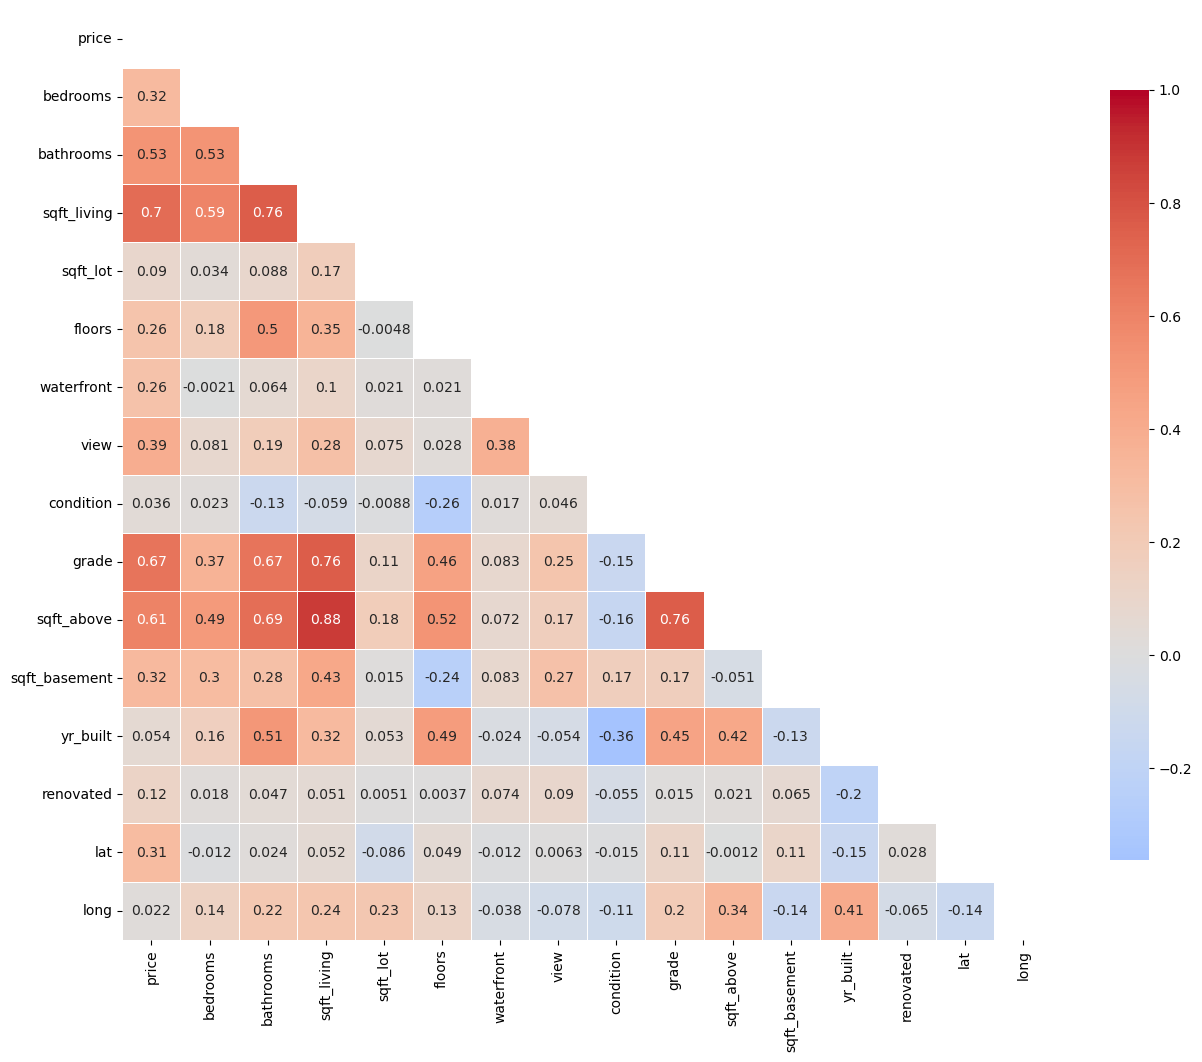

In [91]:
# Visualizing the correlation between all the variables

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

The above correlation heatmap provides a clear and concise way to understand the correlation structure of the dataset. We can be able to see the relationship between different variables.

sqft_living, bathrooms, grade and sqft_above have 0.7 and above multicollinearity. Based on this information we have to make a decision on the predictors that will satisfy our objectives. This strategy will help avoid using predictors that are highly correlated making our model inaccurate.











From the above box plot:
1. we are able to see the spread and variability of the predictor variables in relation to the target variable ('price') 
2. From the distributions we can see some outliers especially in 'sqft_lot'.

Dropping the sqft_lot seems like a good idea because it presents some significant outliers and in addition its correlation with our target variable is significantly low.




*   Plotting the Predictors vs. Price





<IPython.core.display.Javascript object>

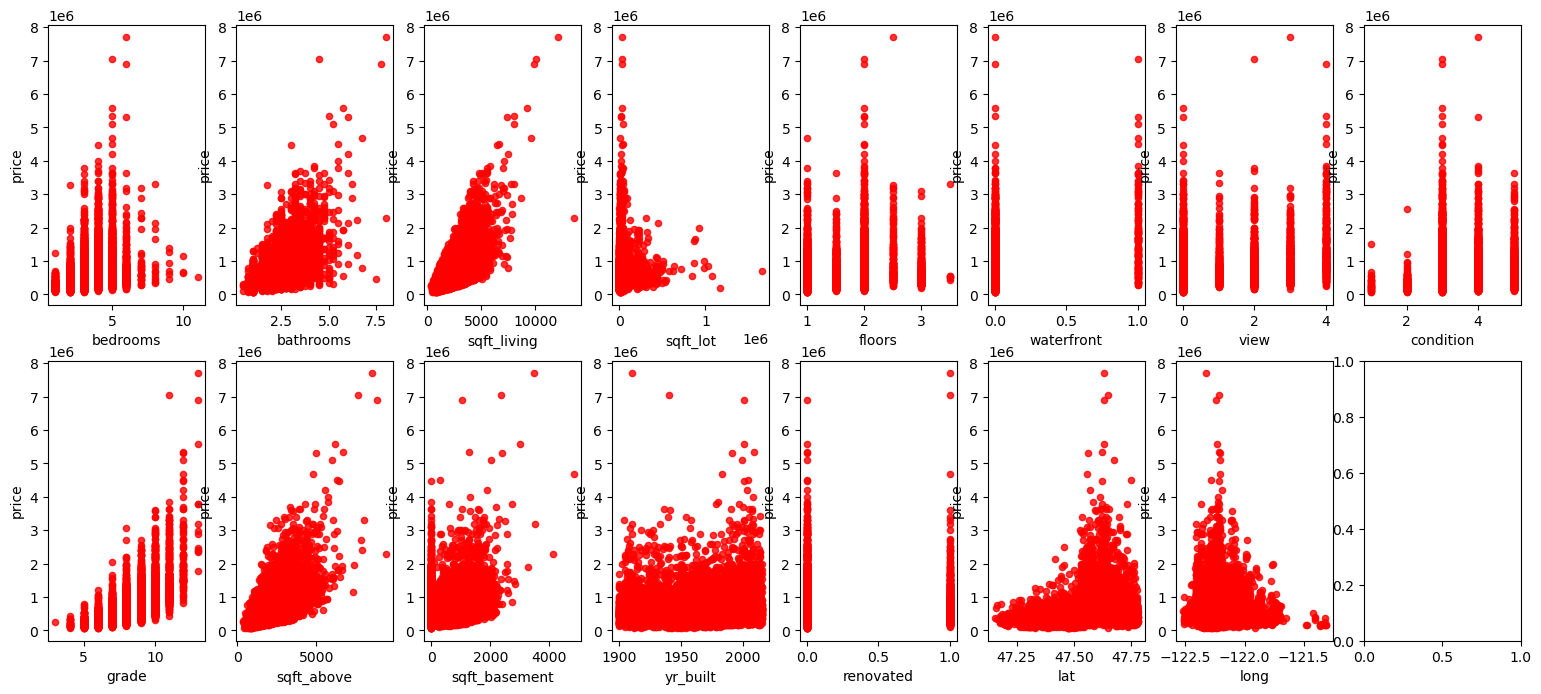

In [92]:
# setup figure
fig, axes = plt.subplots(2,8, figsize=(19, 8))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='price', ax=ax, alpha=0.8, color='r')



**Observations**

* There is a strong positive linear relationship between price, our target variable and our predictors, bathrooms, sqft_living and sqft_above. We can conclude that the forementioned predictors shhould be considered when buying or reenovating a house to sell.

* It is quite interesting from our visualization of the dataset that most expensive house are 2-floors. This is different from our general knowledge that houses with more floors are way more expensive.

* A house being at a waterfront is not as significant when it comes to pricing. We have an almost equal relationship between the two categories.

* We can also see that the houses with a higher grade are more expensive.

* Renovations increase the price of a house based on the final boxplot above. infact the outliers identified in the target variables have renovations improvement on them. 


**Check for Multicollinearity**

*  Variance Inflation Factor (VIF)




In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_data=data.drop(['price'], axis=1)
X_data = add_constant(X_data)
vif = pd.DataFrame([variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])], index=X_data.columns, columns=['VIF'])
vif = vif.sort_values(by='VIF', ascending=False)

vif

<IPython.core.display.Javascript object>

,VIF
const,1.280824e+06
sqft_living,1.466746e+02
sqft_above,1.189174e+02
sqft_basement,3.305468e+01
bathrooms,3.359396e+00
grade,3.134467e+00
yr_built,2.343030e+00
floors,1.962947e+00
bedrooms,1.700850e+00
long,1.419987e+00


Interpreting VIF values:

VIF = 1: No multicollinearity. The predictor variable is not correlated with any other predictors in the model.

VIF > 1 and < 5: Moderate multicollinearity. The predictor variable is correlated with other predictors, but it is not highly problematic.

VIF ≥ 5: High multicollinearity. The predictor variable is strongly correlated with other predictors, and it may be necessary to address the multicollinearity issue in the model.

# 4.0 Model Development

### 4.1 Build a baseline simple linear regression model




**Preparing data for modelling**



In [94]:
#make a copy of tha data to be used
house = data.copy(deep=True)

In [95]:
# Regression variables to be used
y = house['price']  #target
X_baseline = house[['sqft_living']] #predictor

X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# reshape as sklearn needs 2D array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1,1)

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)

# calculating RSME
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean)**2)
ss_residual = np.sum((y_test - baseline_predictions)**2)
r_squared = 1 - (ss_residual / ss_total)

# Print Baseline Model Summary
print("Mean Squared Error:", mse)
print("Baseline Model RMSE:", baseline_rmse)
print("R-squared:", r_squared)
print("Coefficient:", baseline_model.coef_[0])
print("Intercept:", baseline_model.intercept_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Squared Error: 43154636885.504326
Baseline Model RMSE: 256860.61158460553
R-squared: 0.49332469237979504
Coefficient: 282.20150554540413
Intercept: -46447.34551807004


### Model observations
Our baseline model is statistically significant shown by the sqft_living coefficient and intercept pvalues of zero,less that our alpha of 0.05.

* The model explains about 49% of variance in price.

* zero 'sqft_living' has a reduction in price of about $44k. This knowledge is not necessary important but it helps us analysis our model.

* For a unit increase in square foot of living, there is $280k increase in price.

* We shall work to reduce our condition number which is considerably large and increase our r-squared.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

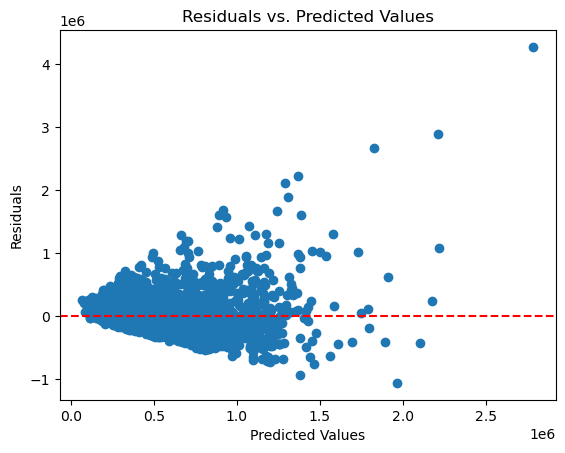

In [96]:
# calculate the residuals
residual = y_test - baseline_predictions
# Plot residuals vs. predicted values
plt.scatter(baseline_predictions, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

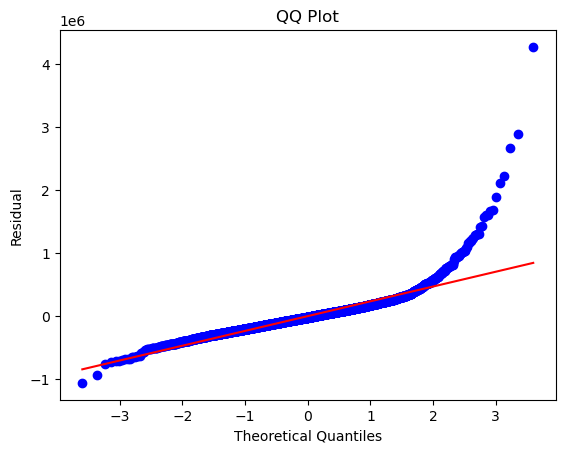

In [97]:
# QQ plot
stats.probplot(residual, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residual")
plt.show()

1. Normality: The primary purpose of a QQ plot is to evaluate the normality assumption of the data.The data points slightly deviations from a the straight line which indicates departures from normality.

2. Skewness and Kurtosis: The data points deviate from the straight line towards the tails, it suggests skewness (asymmetric distribution).Then the data points have also deviated in the center a little bit which indicates kurtosis (heaviness of the tails).

### 4.2 Multiple Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assigning the features and target variables

X = house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'renovated', 'lat', 'view', 'condition', 'grade']]
y = house['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared:", r_squared)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

<IPython.core.display.Javascript object>

Mean Squared Error (MSE): 43154636885.504326


<IPython.core.display.Javascript object>

Root Mean Squared Error (RMSE): 207736.9415523015
R-squared: 0.6685926149332364
Coefficients: [-3.98562746e+04  4.00323252e+04  1.78749947e+02 -1.71481138e-01
  1.64511893e+04 -2.71466355e+03  5.15650647e+04  5.39920311e+05
  7.58310991e+04  3.12230326e+04  1.08006463e+05]
Intercept: -21084378.470234957


#### Model Observations

The model is statistically significant, the p-values of the predictor coefficients are less that our alpha.

* The model now explains about 68% variance in our price. an improvement from our simple model. Introducing more variables has improved our model performance.

* The model condition number has reduced but still significantly high.

* The 'yr-built' variable shows that older houses sell for less price. An additional age reduces the house price by about $3k

* Any change in 'renovation' variable increases the price by about $54k

* It is also interesting that an additional bedroom and sqft_lot reduces the price of the house. that is quite strange based on our background knowledge. 

We will standardize the variables and assess whether there is an improvement in our model


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

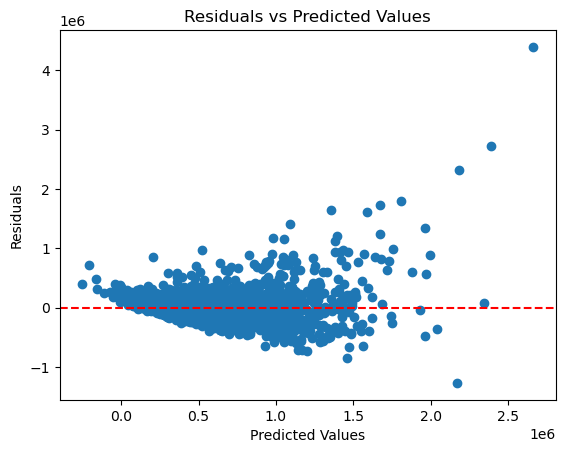

In [99]:
#calculate residuals
residual_1 = y_test - y_pred
# Scatter plot of residuals vs predicted values
plt.scatter(y_pred, residual_1)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

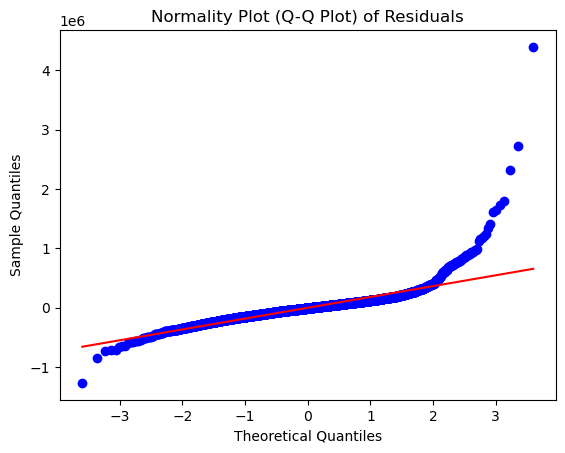

In [100]:
# Plot a normality plot (Q-Q plot) of the residuals
stats.probplot(residual_1, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Normality Plot (Q-Q Plot) of Residuals")
plt.show()

* We can see from the residual qq-plot above that the residuals do not follow a normal distribution.

* Deviations from this pattern may indicate nonlinearity or heteroscedasticity (unequal variance), which can affect the model's accuracy.

1. The **Y and Fitted vs X** plot shows the observed values of the dependent variable against the predicted values. This plot helps assess the linearity assumption by examining the distribution of points around the diagonal line. The deviations indicate non-linearity.

2. The **Residuals versus sft_living** plot displays the residuals against the predicted values. This plot helps assess the assumption of constant variance (homoscedasticity). The increasing spread may indicate heteroscedasticity.

3. The **Partial regression** plot shows the standardized residuals (residuals divided by their standard deviation) against the predicted values. We can identify outliers from the plot. 

4. The **CCPR** plot helps assess the normality assumption of the residuals. 

### Visualization of the target variable.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'transformed price')

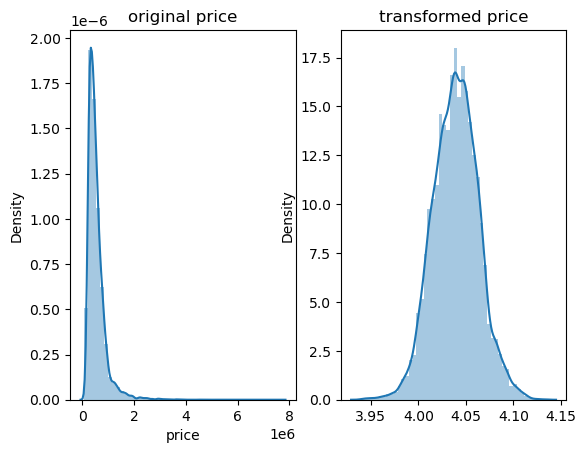

In [101]:
# Normalizing price
scaled_price=data['price']
norm_price=stats.boxcox(scaled_price)

fig, ax=plt.subplots(1,2)
sns.distplot(scaled_price, ax=ax[0])
ax[0].set_title('original price')
sns.distplot(norm_price[0], ax=ax[1])
ax[1].set_title('transformed price')

* We will apply log transformation to the target variable because of the following reasons:

1. In the regression analysis above the relationship between the predictors and the target variable appears to be multiplicative 
2. The target variable exhibits skewness (see the graph above).

By applying a log transformation to the target variable, we can potentially linearize the relationship and improve the model's performance.

In [102]:
#log transformation
y1 = np.log(house['price'])

<IPython.core.display.Javascript object>

* We will run the model again to check if there's any improvement.

## Final Model Observations

We can conclusively say that our model is statistically significant based on our p-values equal to zero. 

Our r-squared has improved, the model now explains about 76% of the variance in price. 

Coefficients: The coefficients represent the estimated 
effects of each predictor variable on the house prices. Here are some key coefficients and their interpretations:

1. An additonal **bedroom** is associated with reduction of $0.0141 in house 
   price.

2. An additional **bathroom** is associated with an increase of $0.0672 in  
   house price.
   
3. An additional unit in **square footage of living** space is associated with
    an increase of $0.0002 in house price. 10000 units in square foot of living space adds $2 in the price of the house

4. The older the house the lower the price (**yr_built**). An additional  
   **age** to the house reduces the house price by $0.0032

5. An improvement in renovation of the house is associated with $0.0785 in the 
    house price. 

6. A step higher in the **view**  scale is associated with an increase of $0. 
   0816 in house price.

7. A step higher in the **grade** scale is associated with an increase of $0. 
   1795 in house price.

8. Just like grade, a step higher in the **condition** scale is associated with 
   an increase of $0.1795 in house price.


Overall, the model suggests that the number of bedrooms, bathrooms, yr_built,renovation, sqft-living, view, grade, condition are important predictors of house prices. 




# 5.0 Model Evaluation

* Checking the distribution of the residuals using a qq plot.

<IPython.core.display.Javascript object>

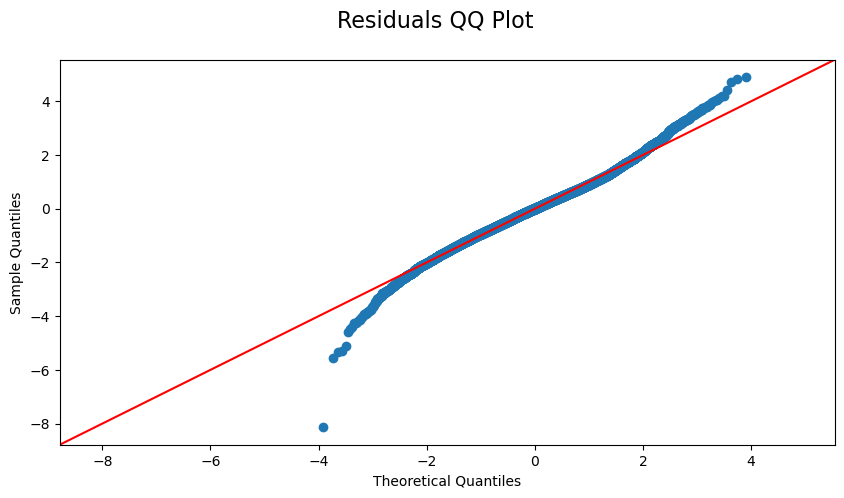

In [104]:
# Residual plot
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()


From the plot we can now say that it follows the normality assumption.

* We have a close to perfect goodness of fit.


In [105]:
# Adding a column of ones to account for the y-intercept
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Predict using the modified feature array with the y-intercept
y_pred = model2.predict(X_with_intercept)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
# Assuming y_true contains the actual values and y_pred contains the predicted values
mae = mean_absolute_error(y1, y_pred)
mse = mean_squared_error(y1, y_pred)
rmse = np.sqrt(mse)


print('Model Mean Absolute Error:', mae)
print('Model Mean Standard Error:', mse)
print('Model Root Mean Standard Error:', rmse)

<IPython.core.display.Javascript object>

Model Mean Absolute Error: 0.1988929930925821
Model Mean Standard Error: 0.06691540133661547
Model Root Mean Standard Error: 0.25868011391797296
